### 04. Pytorch Custom Dataset


How do you get your own data into Pytorch?

One of the ways to do so is via custom datasets

## Domain libraries
Depending on what you're working on, you'll want to look into each of the pytorch existing data loading functions and customizable data loading functions.

In [1]:
import torch
from torch import nn


In [2]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

### 1. Get data

Our dataset is a subset of Food101 dataset.
Food101 starts 101 different classes of food and 1000 images per class, 750 : training, 250 : testing.

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing)

Why do this?

When starting out ML projects, it's important to try things on small scale and then increase the scale when necessary. 
The whole point is to speed up how fast you can experiment.

In [6]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path('./data/')
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists.. skip downloading")
else:
    print(f'{image_path} doesnt exists, creating one..')
    image_path.mkdir(parents=True, exist_ok=True)
with open(data_path / "pizza_steak_sushi.zip" , 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip') 
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)



data\pizza_steak_sushi directory already exists.. skip downloading
Unzipping pizza, steak and sushi data...


### 2. Becoming one with data (data preparation)

In [8]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"tThere are {len(dirnames)} in directories and {len(filenames)} images in '{dirpath}'.")

In [9]:
walk_through_dir(image_path)

tThere are 2 in directories and 0 images in 'data\pizza_steak_sushi'.
tThere are 3 in directories and 0 images in 'data\pizza_steak_sushi\test'.
tThere are 0 in directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
tThere are 0 in directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
tThere are 0 in directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
tThere are 3 in directories and 0 images in 'data\pizza_steak_sushi\train'.
tThere are 0 in directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
tThere are 0 in directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
tThere are 0 in directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [10]:
train_dir = image_path  / "train"
test_dir = image_path / "test"
train_dir

WindowsPath('data/pizza_steak_sushi/train')

### 2.1 Visualizing images

Write some codes to:
1. Get all of the image paths
2. Pick a random image path using python''s random choice()
3. Get the imgage class name using `pathlib.Path.parent.stem`
4. Since we're working images, let's open the image with pythons PIL.
5. We'll then show the image and print metadata

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jpg'), WindowsPat

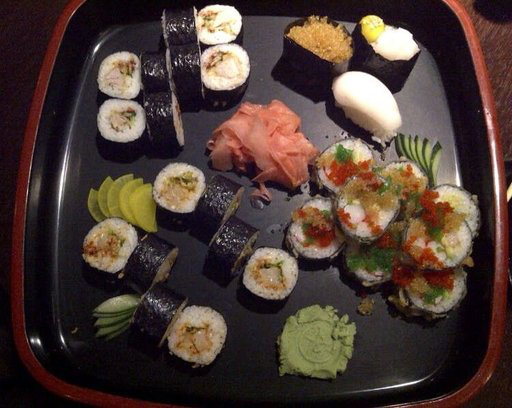

In [44]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list)

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image  path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height : {img.height}")
print(f"Image width: {img.width}")

img

(-0.5, 511.5, 407.5, -0.5)

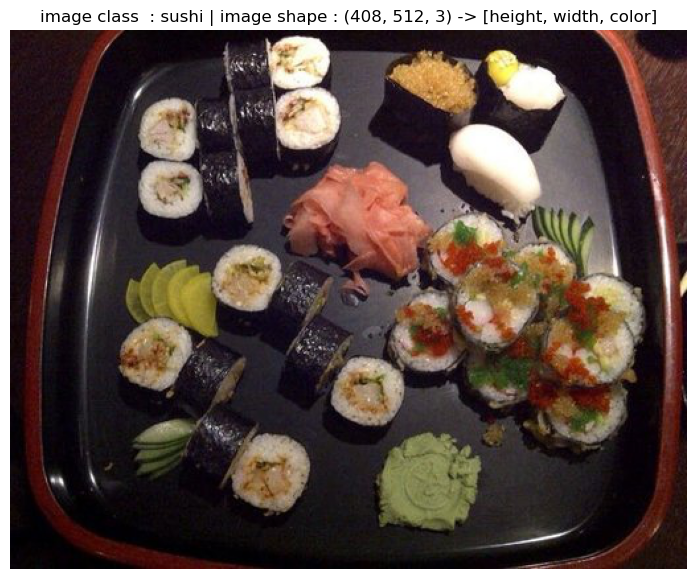

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with plt
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"image class  : {image_class} | image shape : {img_as_array.shape} -> [height, width, color]")
plt.axis(False)

### 3. Transforming data

Before we can use our image data with pytorch: 
1. Turn you target data into tensors .
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DatalLoader`

In [55]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with torchvision.transforms


In [56]:
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our images to 64*64
    transforms.Resize(size = (64,64)),
    # Flip the images randomly on the horizental
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

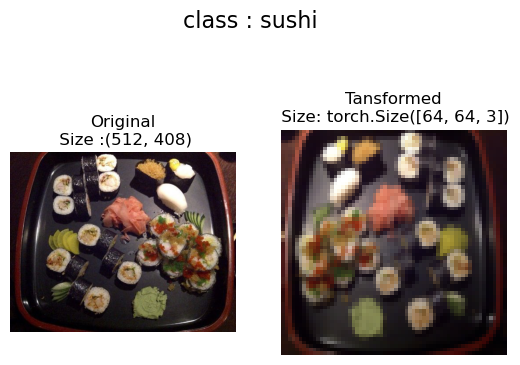

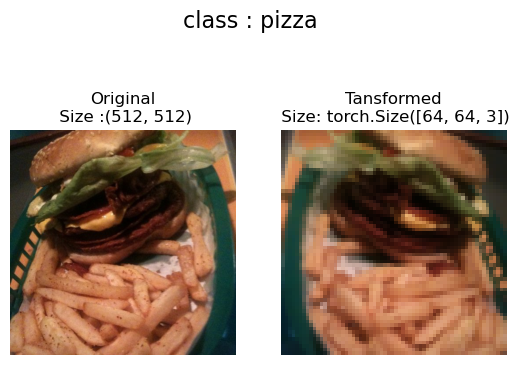

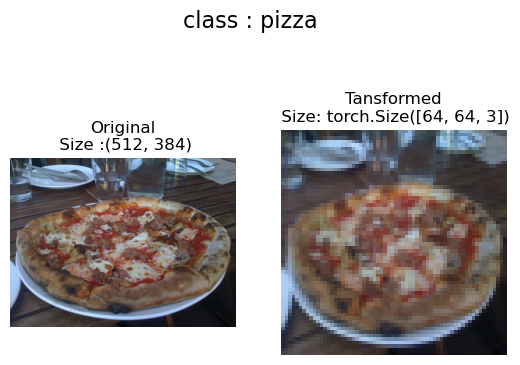

In [68]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """
    selects random images from a path of images loads/transforms them then plots the original vs the tranformed version.
    """
    if seed:
        random.seed(42)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\n Size :{f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0) # change to (H,W,C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Tansformed\n Size: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"class : {image_path.parent.stem}",fontsize = 16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform)
